In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import ceil, sqrt
import pandas as pd 
import numpy as np 

df = pd.read_csv('apple_mobility_may_6.csv')
df_cdmx = df.query("subregion_and_city == 'Mexico City'")
cdmx_data = df_cdmx.reset_index(drop=True)
cdmx_data.set_index('date',inplace=True)
cdmx_data.head()

,country,subregion_and_city,geo_type,driving,transit,walking
date,,,,,,
2020-01-13,Mexico,Mexico City,city,0.00,0.00,0.00
2020-01-14,Mexico,Mexico City,city,-0.08,1.92,4.29
2020-01-15,Mexico,Mexico City,city,1.77,3.25,12.48
2020-01-16,Mexico,Mexico City,city,8.69,6.87,15.28
2020-01-17,Mexico,Mexico City,city,30.08,17.28,41.15


In [2]:
cdmx_data.tail()

,country,subregion_and_city,geo_type,driving,transit,walking
date,,,,,,
2020-05-02,Mexico,Mexico City,city,-68.00,-87.15,-77.17
2020-05-03,Mexico,Mexico City,city,-74.18,-86.90,-82.41
2020-05-04,Mexico,Mexico City,city,-69.63,-84.53,-77.21
2020-05-05,Mexico,Mexico City,city,-70.29,-84.74,-76.88
2020-05-06,Mexico,Mexico City,city,-68.02,-84.58,-76.68


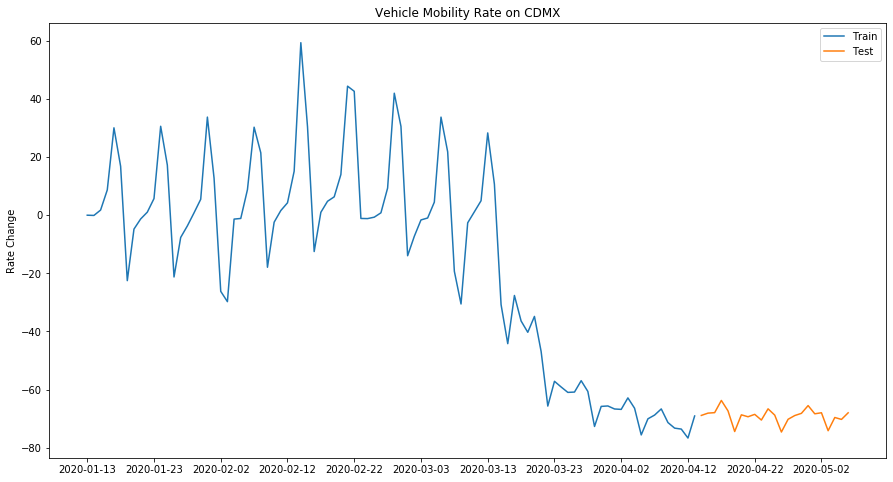

In [3]:
# Split train test
# Split percentage
split_pct = .8
split = len(cdmx_data)*split_pct
split_num = ceil(split)
train = cdmx_data.iloc[:split_num]
test = cdmx_data.iloc[split_num:]
days_subset = cdmx_data.iloc[::10].index.tolist()

#Plotting data
plt.figure(figsize=(15,8))
plt.plot(train.index, train['driving'], label='Train')
plt.plot(test.index,test['driving'], label='Test')
plt.legend(loc='best')

plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Mobility Rates.png')
plt.show()

# Naive approach

RMS Error: 2.528635995947222


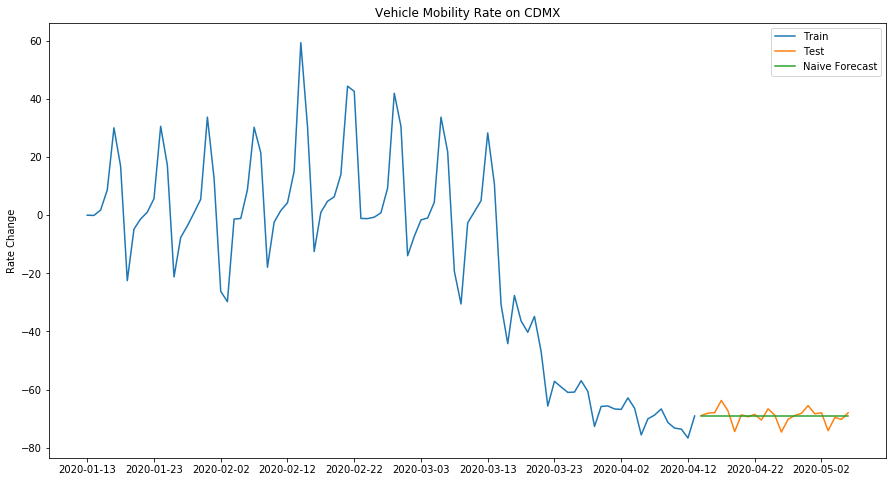

In [4]:
x = np.asarray(train.driving)
y_hat = test.copy()
y_hat['naive'] = x[len(x)-1]
plt.figure(figsize=(15,8))
plt.plot(train.index, train['driving'], label='Train')
plt.plot(test.index,test['driving'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

rms = sqrt(mean_squared_error(test.driving, y_hat.naive))
print('RMS Error:',rms)

plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Naive Forecast.png')

# Simple average

RMS Error: 54.05493542387329


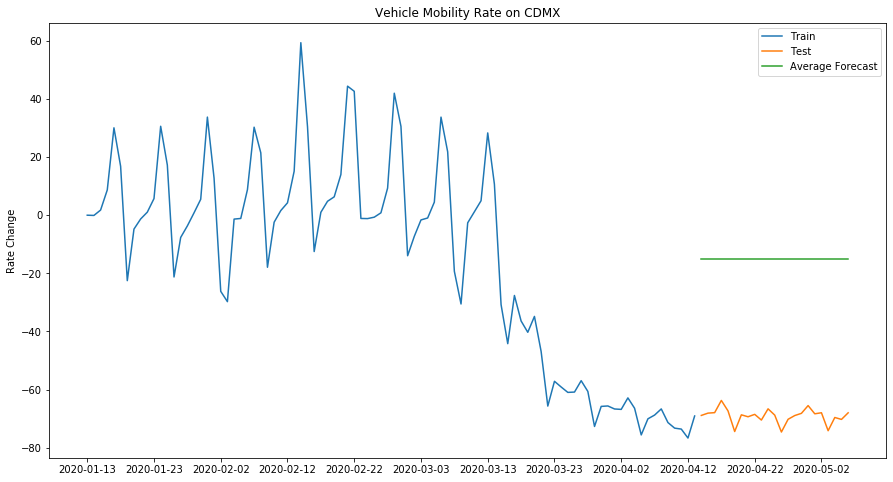

In [5]:
y_hat = test.copy()
y_hat['avg_forecast'] = train['driving'].mean()
plt.figure(figsize=(15,8))
plt.plot(train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

rms = sqrt(mean_squared_error(test.driving, y_hat.avg_forecast))
print('RMS Error:',rms)
plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Simple Average.png')

# Moving Average

RMS Error: 44.24147935694308


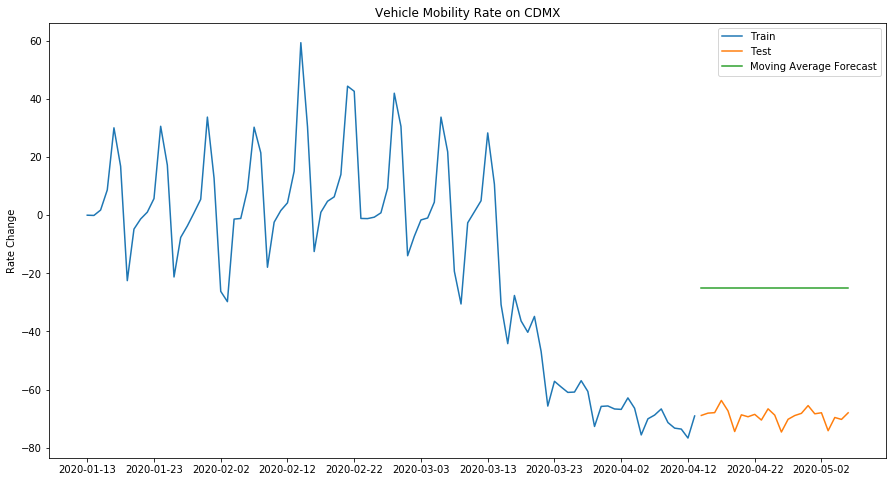

In [6]:
y_hat['moving_avg_forecast'] = train['driving'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
rms = sqrt(mean_squared_error(test.driving, y_hat.moving_avg_forecast))
print('RMS Error:',rms)

plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Moving Average.png')
plt.show()

# Simple Exponential Smoothing

RMS Error: 3.5200665322423834


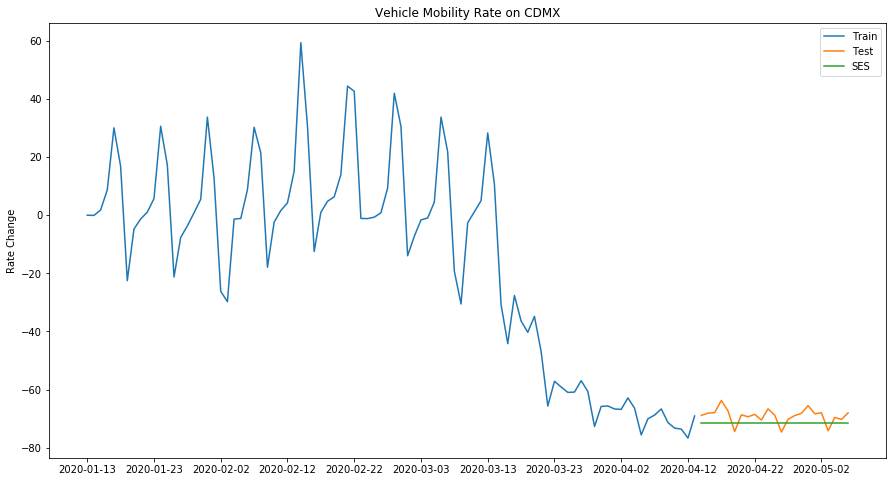

In [7]:
fit2 = SimpleExpSmoothing(np.asarray(train['driving'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot(train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['SES'], label='SES')
plt.legend(loc='best')
rms = sqrt(mean_squared_error(test.driving, y_hat.SES))
print('RMS Error:',rms)

plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)

plt.savefig('Simple Exp Smoothing.png')
plt.show()

# Holt’s Linear Trend method

RMS Error: 3.436050608041943


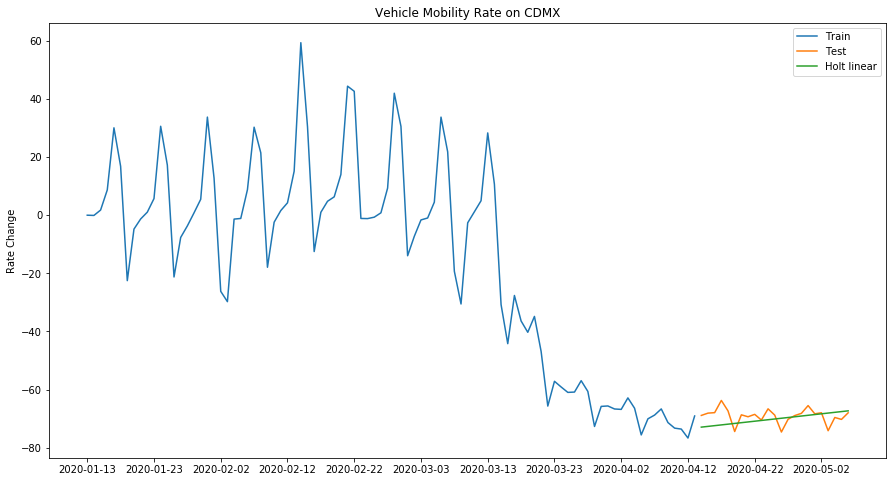

In [8]:
fit1 = Holt(np.asarray(train['driving'])).fit(smoothing_level=.5,smoothing_slope=.5)
y_hat['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(15,8))
plt.plot(train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')

rms = sqrt(mean_squared_error(test.driving, y_hat.Holt_linear))
print('RMS Error:',rms)

plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Holt linear.png')
plt.show()

# Holt_Winter

RMS Error: 15.187076514193517


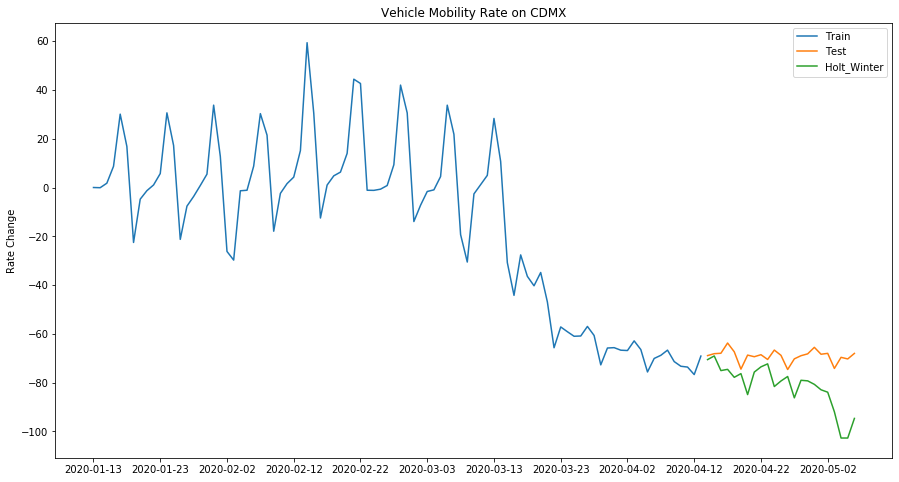

In [9]:
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['driving']) ,seasonal_periods=23 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot( train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

rms = sqrt(mean_squared_error(test.driving, y_hat.Holt_Winter))
print('RMS Error:',rms)
plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('Holt Winter.png')
plt.show()

# ARIMA

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMS Error: 2.3699248504538053


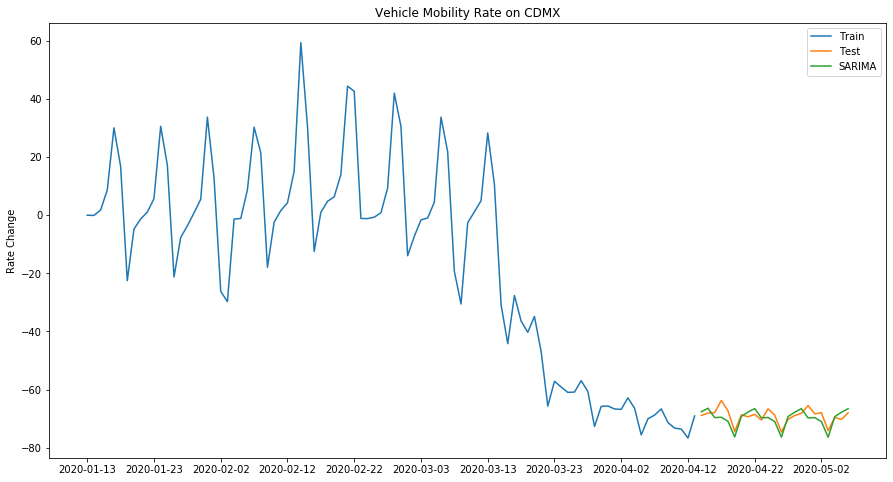

In [10]:
y_hat_avg = {}
fit1 = sm.tsa.statespace.SARIMAX(train.driving,seasonal_order=(0,1,1,7),freq='D').fit()
y_hat['SARIMA'] = fit1.predict(freq='D',start="2020-04-14", end="2020-05-06", dynamic=True)
plt.figure(figsize=(15,8))
plt.plot( train['driving'], label='Train')
plt.plot(test['driving'], label='Test')
plt.plot(y_hat['SARIMA'], label='SARIMA')
plt.legend(loc='best')

rms = sqrt(mean_squared_error(test.driving, y_hat.SARIMA))
print('RMS Error:',rms)
plt.title('Vehicle Mobility Rate on CDMX')
plt.ylabel('Rate Change')
plt.xticks(days_subset)
plt.savefig('ARIMA.png')
plt.show()